In [1]:
import os
import tarfile
import urllib

In [2]:
#setting path variables to create a directory and store Housing.tgz fetched from the URL
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:

def fetch_data(h_url = HOUSING_URL, h_path = HOUSING_PATH):
    os.makedirs(h_path, exist_ok = True)
    tgz_path = os.path.join(h_path, "housing.tgz")
    urllib.request.urlretrieve(h_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=h_path)
    housing_tgz.close()

In [4]:

import pandas as pd
def load_data(h_path = HOUSING_PATH):
    fetch_data()
    csv_path = os.path.join(h_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


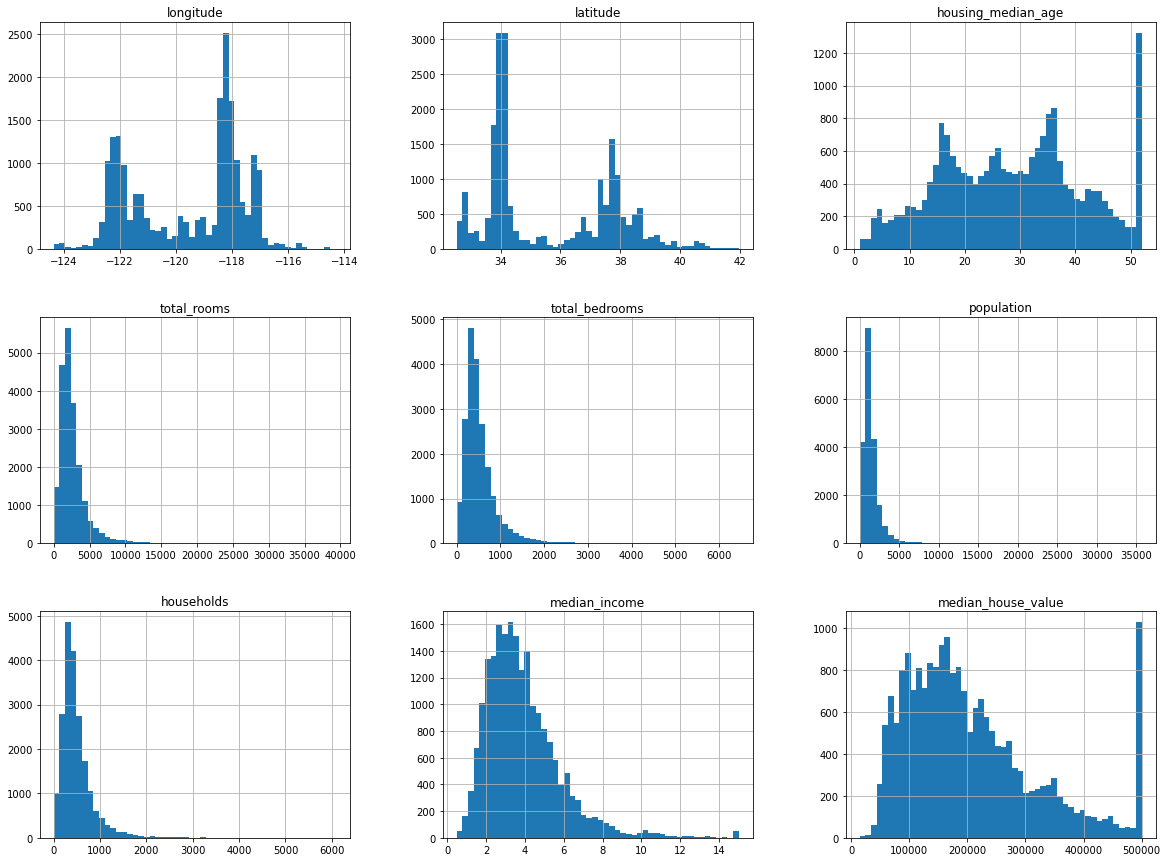

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
import numpy as np

def split_set(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

<AxesSubplot:>

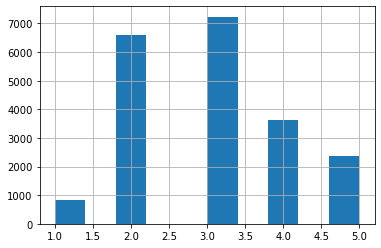

In [10]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
# Removing 'income_cat' from the sets to restore it to original state
for s in (strat_train_set, strat_test_set):
    s.drop("income_cat", axis=1, inplace=True)

In [14]:
#copying train test into housing
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

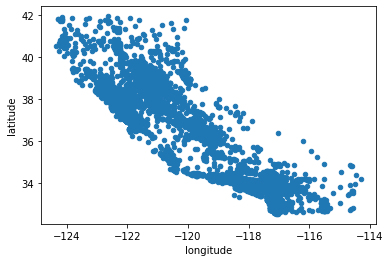

In [15]:
#plotting housing to observe trends
housing.plot(kind='scatter', x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

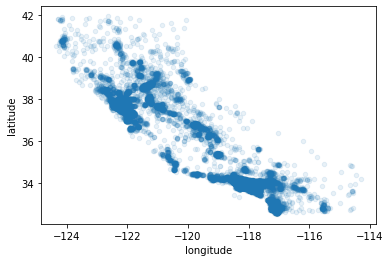

In [16]:
#since we can not observe any pattern in this particular plot, we adjust the alpha
housing.plot(kind='scatter',x='longitude',y='latitude', alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

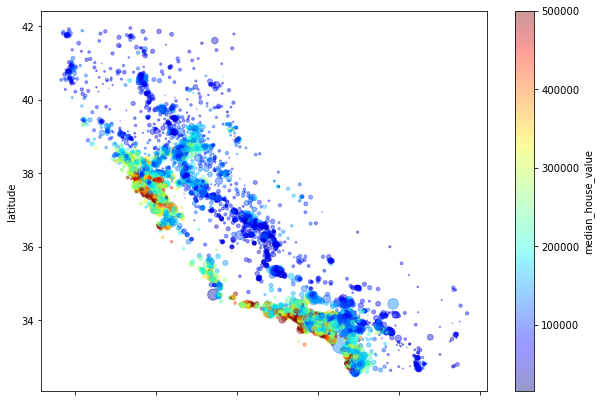

In [17]:
# s -> radius of circle(represents district's population)
# c -> color of circle(price)
# cmap -> predefined color map called jet
housing.plot(kind='scatter',x='longitude',y='latitude', alpha=0.4, s=housing['population']/100, figsize=(10,7), c='median_house_value', cmap = plt.get_cmap("jet"),colorbar=True)


In [18]:
#computing standard correlation coefficent
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

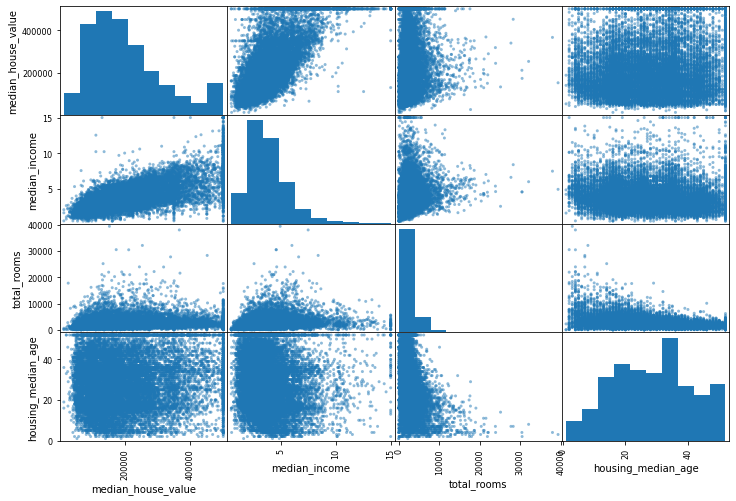

In [19]:
#checking correlation using pandas
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

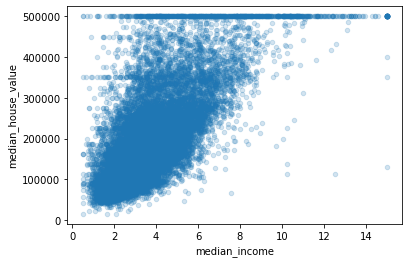

In [20]:
#Zooming in on correlation scatterplot of Median_income & Median_House_Value
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

The Graph above shows that there is a strong positive correlation between both the variables. 
If we look closely there are horizontal lines, which are less apparent, at around 45K, 35K, 28K and a few more below that. 
We may need to remove corresponding districts to avoid our model from learning from these. 

In [21]:
#Experimenting with Attribute Combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

In [23]:
#Reverting back to Clean Training Set to prepare the data for ML algorithms
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [24]:
#Replacing Missing Values using Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#since median can only be computed on numerical values we get rid of Ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [25]:
#imputer stores the median of every attribute in statistics_
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [26]:
#transforming training set be replacing missing values
X = imputer.transform(housing_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [27]:
#Converting the above numpy array into DF
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


# Handling Text and Categorical Attributes

Machine Learning Algorithms have hard time working with text. So sometimes we have to convert text to numbers. We do this using an **Encoder**. 
Specifically we use Scikit-Learn's *OrdinalEncoder*.

In [28]:
from sklearn.preprocessing import OrdinalEncoder
housingCat = housing[["ocean_proximity"]]
ordinal = OrdinalEncoder()
housing_cat_encoded = ordinal.fit_transform(housingCat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

## Issues with Approach

A ML algorithm may assume that two nearby values (like 3 and 4) are similar. This may be fine in some cases but not desirable in some.  Solution is to create a binary attribute per category using *OneHotEncoder*. This is called **One-Hot Encoding**.

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_hot = cat_encoder.fit_transform(housingCat)
housing_cat_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [30]:
housing_cat_hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Tips
If a categorical attribute has number of categories (in this case we have 5), using Hot Encoding would slow down training and degrade performance. In this case we replace the categorical input with numerical features related to the corresponding category. For example: ocean_proximity can be replaced with distance from ocean.
Or we can use **Representation Learning** by replacing each category with a learnable, low-dimensional vector called **embedding**.

# Custom Transformers(Pending



# Feature Scaling
ML algorithms do not perform well when the numerical attributes have very different scales. In our case the total number of rooms range from 6 to 39,370 while median income's range is only 0 to 15. 
So there are two common ways to get all attributes to have the same scale: 

1. Min-Max Scaling (aka Normalization)

   Values are shifted and rescaled so that they end up between 0 and 1. This is done by subtracting the *min* &     dividing by *max* minus *min*. Scikit Learn has MinMaxScaler for this. It's feature_range hyperparameter allows us change the range too.
   
   
2. Standardization
   
   This method does not bound the values to a range. First it subtracts the mean value and then it divides by the standard deviation so that resulting distribution has unit variance. Scikit-Learn provides StandardScaler Transformer for this.
   
MinMaxScaler is generally used by algorithms which expect a value range in the input. For example: Nueral Networks often expect a value range from 0 to 1. 
Standardization on the other hand is used when the data has outliers because it is not much affected by outliers contrary to MinMaxScaler.

* As with all transformation, it is important to fit the scalers to training data only. Only then you can use them to transform the training set.

# Transformation Pipelines

Transformation steps are need to be executed in the right order. For this purpose we use  Scikit-Learn's *Pipeline* class. The pipeline constructor that we call take a list of name/estimate pairs defining a sequence of steps. 

1. Except the last estimator every one of the estimator must have fit_transform() method i.e. all but last estimator must be transformer. 

2. The names of these estimators can be anything as long as they don't have double underscores. These names are later used for hyperparameter tuning. 

Earlier we handled categorical and numerical columns separately. But we can also create a single transformer for all columns. This transformer is *ColumnTransfer*. 
We take the list of numerical column names and the list of categorical column names separately and input them in the constructor (name mustn't have 2 underscores), along with a transformer and a list of names transformer should be applied to. 

It applies each transformer to the appropriate columns and concatenates the outputs along the second axis. Remember that transformers must return the same number of rows.

* When there is a mix of sparse & dense matrices, ColumnTransformer estimates the density of the final matrix (density of matrix is ratio of non-zero cells) and returns a sparse matrix if the density is lower than a given threshold. By default the threshold is 0.3. 


In [31]:
#small pipeline for the numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [33]:
#Using ColumnTransformer 
from sklearn.compose import ColumnTransformer
num_att = list(housing_num)
cat_att = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_att),
    ("cat", OneHotEncoder(), cat_att),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [34]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Select & Train a Model

## 1. Training & Evaluating on the Training Set
We will implement a Linear Regression Model here and evaluate by calculating it's RMSE. 

In [35]:
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels", list(some_labels))

Predictions:  [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]
Labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [36]:
#Computing the RMSE on training set
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.56219504567

We see here that we get a prediction error of 69050 approx which is not very great. This means that model is underfitting the data.  
This can mean two things that either the features do not provide enough info or the model is not powerful enough. 

Three ways to fix this sitation: 
1. Select a more powerful model
2. Feed the training algorithm with better features
3. Reduce the constraints on the model.

Since the model is regualrised we can't remove constraints. So we are left with option 2 and 1.

In [37]:
#Trying a more complex model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [38]:
#Evaluating the model
housing_preds = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

0 error means that the model badly overfits the training data. 

## Cross-Validation

A better evaluation for Decision Tree model would be to use the *test_train_split()* to split the training set into smaller training set and the train your model against it and evaluate them against the new validation set.

Another alternative is to use Scikit-Learn's *K-Fold Cross Validation* feature. In the following code, training set is randomly split into 10 distinct subsets called **folds**. Then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on other 9 other folds. So we get an array containing 10 evaluation scores.


In [39]:
#Using K-fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [71145.94194417 69565.22901955 65432.27923219 69082.13624605
 67692.91823522 67849.21499778 73646.75698943 71016.3575558
 66131.96396743 71834.8996429 ]
Mean:  69339.76978305288
Standard Deviation:  2479.0844539820373


In [41]:
#computing the same for Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean:  69204.32275494763
Standard Deviation:  2372.0707910559213


We see that DecisionTree overfits badly to the model. linear Regression is better than DecisionTree. Lets now use Random Forest.

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_preds = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_preds)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18401.167928380757

In [43]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores:  [50316.83809867 49289.71930935 46333.6377104  50186.50777266
 47372.19620266 49345.16454567 51606.12029766 48647.90721477
 47783.78822885 53180.99492655]
Mean:  49406.287430724544
Standard Deviation:  1932.0765874137026


### How to save a model
#Saving a Model

import joblib

joblib.dump(my_model, "my_model.pkl")

# Fine Tuning the Model

## Grid Search 
This method allows us to experiment with different hyperparameters. It cross-validates all possible combinations with hyperparameters. 

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
#getting the best estimator directly
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [47]:
#getting the evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64119.877442982855 {'max_features': 2, 'n_estimators': 3}
54507.777008571975 {'max_features': 2, 'n_estimators': 10}
52727.3593746605 {'max_features': 2, 'n_estimators': 30}
59733.40250485356 {'max_features': 4, 'n_estimators': 3}
53065.86352679316 {'max_features': 4, 'n_estimators': 10}
50566.67820950649 {'max_features': 4, 'n_estimators': 30}
58886.016564557816 {'max_features': 6, 'n_estimators': 3}
52338.84005595166 {'max_features': 6, 'n_estimators': 10}
50095.601947479576 {'max_features': 6, 'n_estimators': 30}
58051.71076509374 {'max_features': 8, 'n_estimators': 3}
51973.0199040183 {'max_features': 8, 'n_estimators': 10}
49981.760759183286 {'max_features': 8, 'n_estimators': 30}
60835.08491242656 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54001.66636964472 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59309.176185395576 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52132.907482793235 {'bootstrap': False, 'max_features': 3, 'n_estimators

## Randomized Search

When we are exploring relatively few combinations but the hyperparameter search space is large, RandomizedSearchCV is preferred over the the GridSearchCV class. But instead of evaluating all possible combinations it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

Benefits of this approach:
1. For a 1000 iterations Randomized Searchw ould explore 1000 different values for each hyperparameter instead of just a few values per hyperparameter as in grid search.
2. Simply by setting the iterations, we have more control over the computating budget you want to allocate to the hyperparameter search.

## Analyze the Best Models and Their Errors

We gain good insights while inspecting the best models. For example: the Random Forest can indicate the relative importance of each attribute for making accurate predictions. (Implemented Below)

Looking at the specific errors that our system makes, we must understand the reason behind them and what could fix the problems like adding extra features, getting rid of uninformative ones, cleaning up outliers, etc.

In [48]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.15039914e-01, 1.09030084e-01, 4.94566799e-02, 3.02277441e-02,
       2.67495935e-02, 3.75736437e-02, 2.53002628e-02, 4.47828822e-01,
       1.16153481e-02, 1.39776906e-01, 5.50433163e-05, 1.61355241e-03,
       5.73240594e-03])

In [49]:
extra_attrs = ["rooms_per_hh","pop_per_hh", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attrs = list(cat_encoder.categories_[0])
attrs = num_att + extra_attrs + cat_one_hot_attrs
sorted(zip(feature_importances, attrs), reverse = True)

[(0.44782882238881294, 'median_income'),
 (0.13977690601788678, 'pop_per_hh'),
 (0.11503991414066939, 'longitude'),
 (0.10903008363039052, 'latitude'),
 (0.04945667992604743, 'housing_median_age'),
 (0.03757364365640268, 'population'),
 (0.03022774409485486, 'total_rooms'),
 (0.026749593530660042, 'total_bedrooms'),
 (0.02530026281537334, 'households'),
 (0.011615348137548533, 'rooms_per_hh'),
 (0.00573240593734655, 'INLAND'),
 (0.001613552407714682, '<1H OCEAN'),
 (5.5043316292260356e-05, 'bedrooms_per_room')]

We observe above that ocean_proximity attribute is very useful. In the same manner we can determine the importance of attributes in the dataset and drop the ones that are less informative.

# Evaluating The System on Test Set

Now we have to run the full_pipeline on the test Data and call transform() {not fit_transform() because we don't want to fit the test set.} and then evaluate the final model on the test set.

In [51]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47432.787349891274

To get an idea of how precise the estimate is, we may computer a 95% confidence interval for generalization error.

In [52]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale = stats.sem(squared_errors)))

array([45494.12564557, 49295.26512054])